# **Laboratorio 4: EDA Univariado**

Importar librerías

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#Imprimir el nombre de los datasets que tiene la librería seaborn
print (sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [3]:
#Cargamos el dataset diamonds
data = sns.load_dataset('diamonds')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Podemos darle un vistazo al tipo de las variables del dataset. Para ello usamos la función `info()`

In [6]:
#ver tipo de variables del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [11]:
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

##A. Análisis Univariado: Método no gráfico

### **Variables Categóricas**

Generación de tablas de frecuencia


In [56]:
#Serie de Frecuencias
frecuenciasSerie = data.cut.value_counts() 
frecuenciasSerie

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [57]:
#Serie de Proporción
proporcionSerie = data.cut.value_counts(normalize=True)
proporcionSerie

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

In [58]:
tablaFrec = pd.DataFrame(columns = ['Frecuencia', 'Proporción'])

In [59]:
tablaFrec['Frecuencia'] = frecuenciasSerie

tablaFrec['Proporción'] = proporcionSerie

In [60]:
tablaFrec

,Frecuencia,Proporción
Ideal,21551,0.399537
Premium,13791,0.255673
Very Good,12082,0.223990
Good,4906,0.090953
Fair,1610,0.029848


### **Variables Cuantitativas**

`describe()` Devuelve un resumen estadístico de las columnas numéricas presentes en el conjunto de datos. Este método calcula algunas medidas estadísticas como el percentil, la media y la desviación estándar de los valores numéricos de la Serie o DataFrame.

In [7]:
#Estadística Descriptiva de las variables cuantitativas
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##B. Análisis Univariado: Método gráfico

Recordemos que en el dataset diamonds existen sólo tres datos categóricos (cut, color y clarity) y los demás son datos cuantitativos. 

In [25]:
#Se puede cambiar el tamaño de las figuras 
sns.set(rc={"figure.figsize":(10, 8)}) #ancho=8, alto=4

### **Bar Plots** : Gráfico para la comparación de datos categóricos

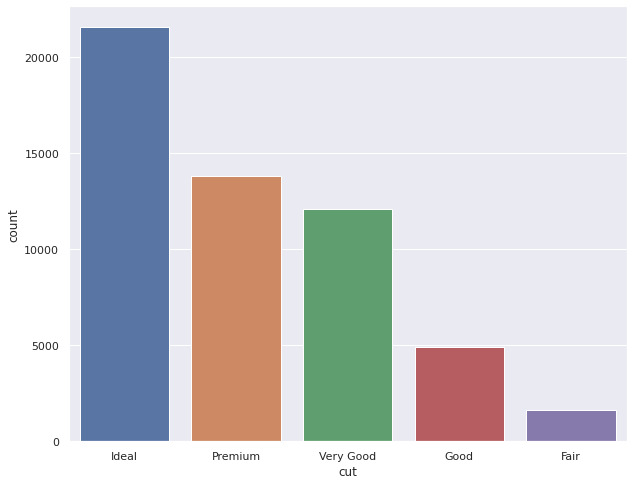

In [26]:
sns.countplot(data=data, x = 'cut')

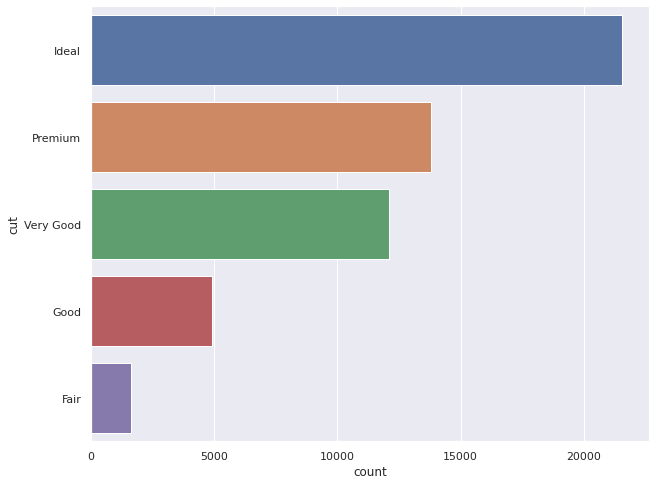

In [28]:
#Dibujar las barras horizontales
sns.countplot(data=data, y = 'cut')

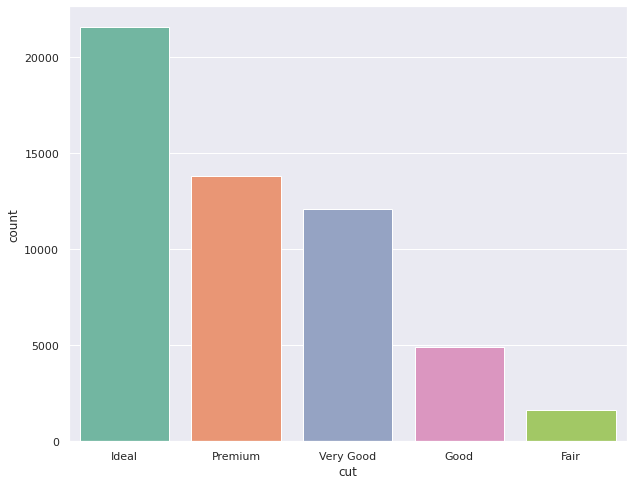

In [37]:
sns.countplot(data=data, x = 'cut', palette='Set2')

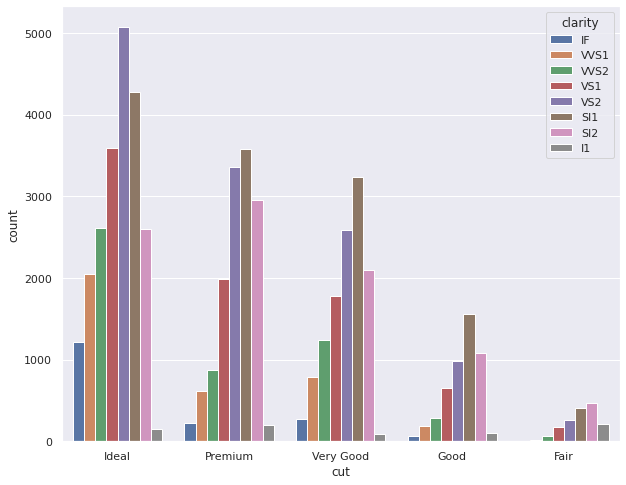

In [27]:
#Puedo usar otra variable categorica para dividir las barras
sns.countplot(data=data, x = 'cut', hue = 'clarity')

## **Histogramas:**  Para un rango de datos continuos 

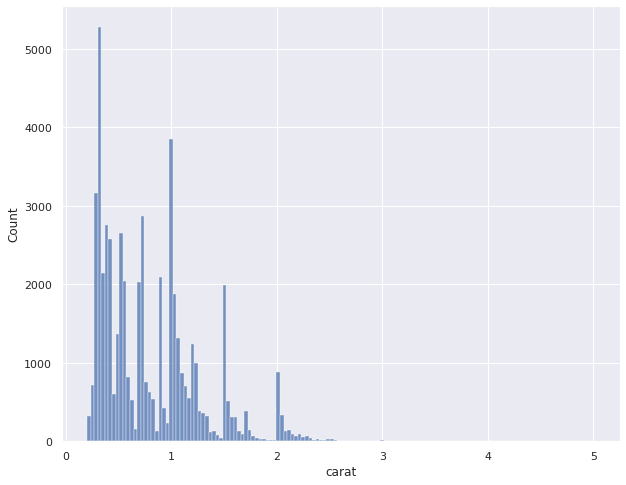

In [38]:
sns.histplot(data=data, x= 'carat')

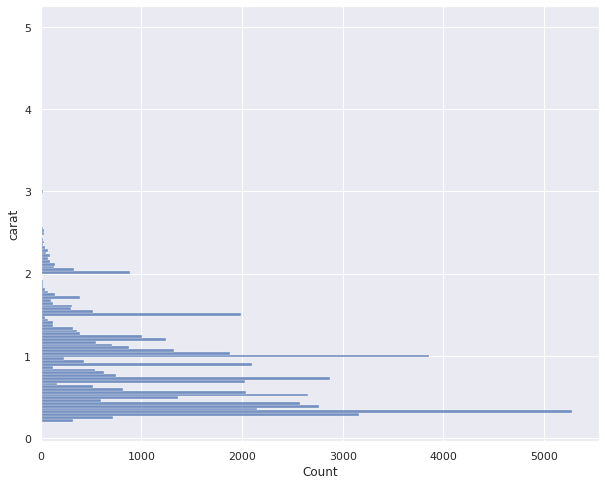

In [39]:
sns.histplot(data=data, y= 'carat')

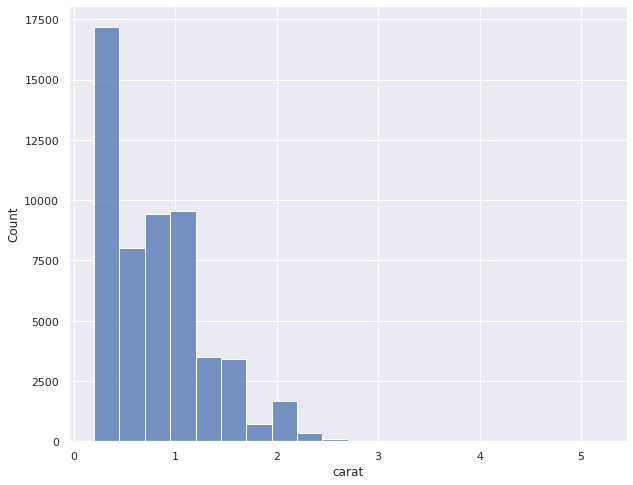

In [45]:
#Cambiar el tamaño del bin
sns.histplot(data=data, x= 'carat', binwidth=0.25)

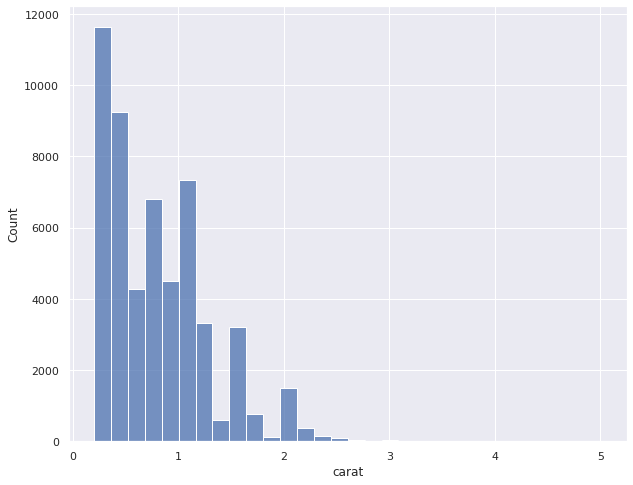

In [47]:
#se puede definir el número de bins
sns.histplot(data=data, x= 'carat', bins=30)

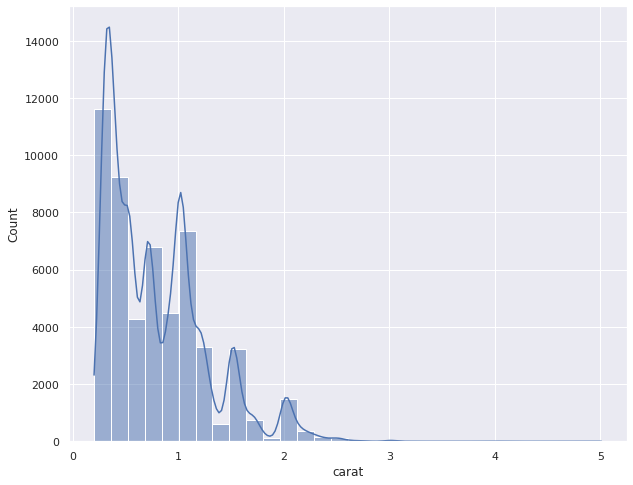

In [48]:
sns.histplot(data=data, x= 'carat', bins=30, kde=True)

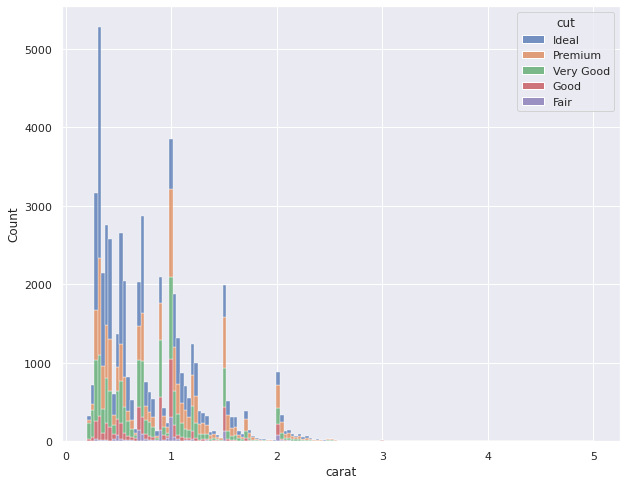

In [50]:
sns.histplot(data=data, x='carat', hue='cut', multiple="stack")

## **Boxplots**

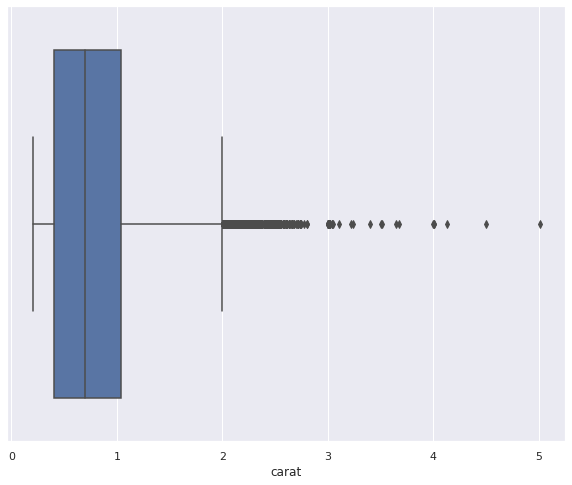

In [52]:
#Dibujar un boxplot horizontal
sns.boxplot(x=data['carat'])

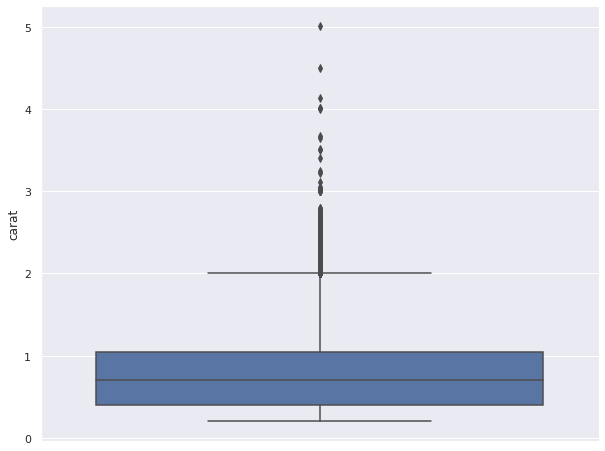

In [54]:
#Dibujar un boxplot vertical
sns.boxplot(y=data['carat'])

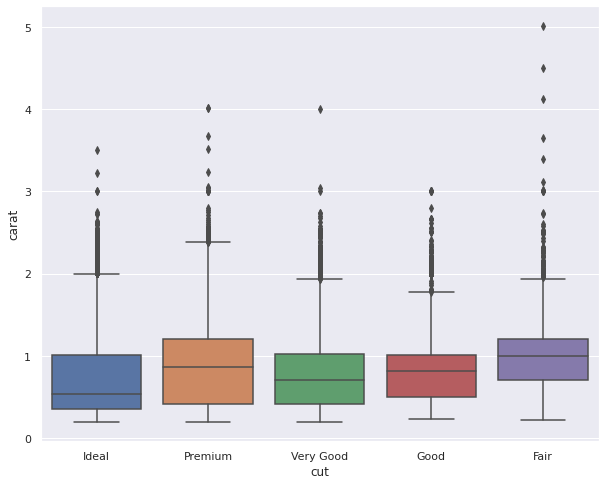

In [55]:
#Dibuje una gráfica de caja vertical agrupada por una variable categórica:
sns.boxplot(x='cut', y="carat", data=data)

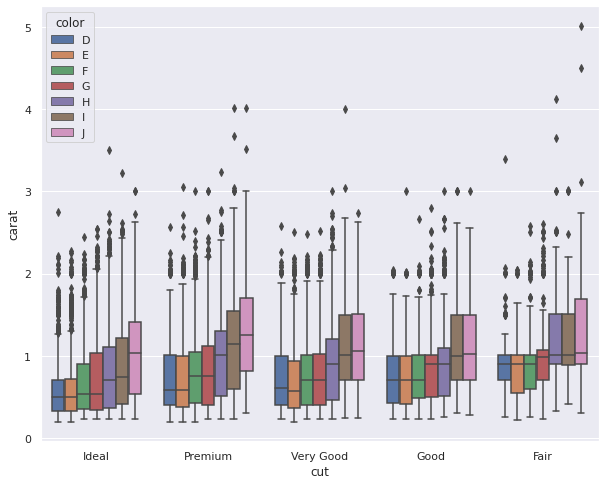

In [61]:
# Con dos varialbes categóricas 
sns.boxplot(x='cut', y="carat", data=data, hue='color')